<center><img src="https://ivybound.net/wp-content/uploads/2016/11/score-300x300.jpg",height='500',width='500'></center>

<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Dataset Overview</b></h1>

* School : Name of the school the student is enrolled in.
* School setting : The location of the school.
* School type : The type of school. Either public or non-public.
* Classroom : The type of classroom.
* Teaching method : Teaching methods: Either experimental or Standard.
* n_student : Number of students in the class.
* Student_id : A unique ID for each student.
* Gender : The gender of the students: male or female.
* Lunch : Whether a student qualifies for free/subsidized lunch or not.
* Pretest : The pretest score of the students out of 100.




<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Importing libraries and loading Dataset</b></h1>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data=pd.read_csv("../input/predict-test-scores-of-students/test_scores.csv")
data.head(5)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
#drop the student_id Column
data.drop(['student_id'],axis=1,inplace=True)

In [4]:
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

There are no missing values in any attributes

In [5]:
#numerical attributes
numeric_columns=data.select_dtypes(include=['number']).columns.tolist()

#categorical attributes
cat_columns=data.select_dtypes(exclude=['number','bool_']).columns.tolist()

In [6]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Visuzlisation</b></h1>

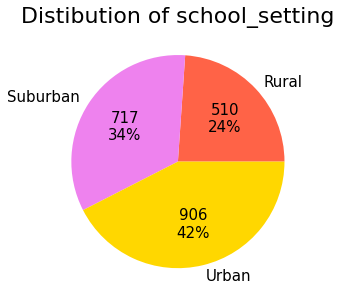

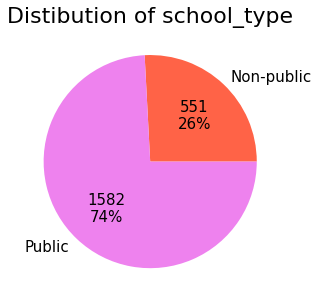

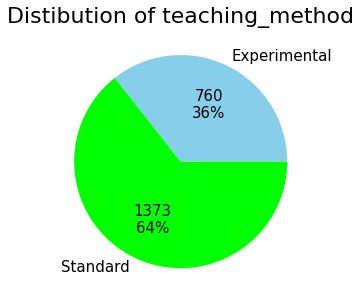

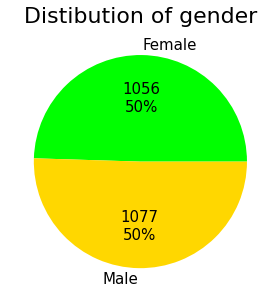

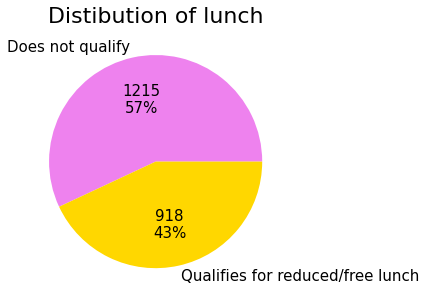

In [7]:
colors=['tomato', 'gold', 'skyblue','violet', 'lime']
for col in cat_columns:
    col_no=len(pd.unique(data[col]))
    if col_no<4:
        color=(random.sample(colors, col_no))
        data.groupby(col).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},colors=color)
        #plt.xlabel('Per country', size=22)
        #plt.ylabel('Per gender', size=22)
        plt.ylabel("")
        plt.tight_layout()
        plt.title("Distibution of {}".format(col),size=22)
        plt.show()

In [8]:
pd.crosstab(data['school_setting'],data['school_type'], normalize='index')

school_type,Non-public,Public
school_setting,,
Rural,0.190196,0.809804
Suburban,0.269177,0.730823
Urban,0.288079,0.711921


In [9]:
pd.crosstab(data['school_type'],data['lunch'], normalize='index')

lunch,Does not qualify,Qualifies for reduced/free lunch
school_type,,
Non-public,0.713249,0.286751
Public,0.519595,0.480405


The above table shows,Most of the students from non-public school are not qualified for reduced/free lunch.

In [10]:
pd.pivot_table(data, values='posttest', index=['school_type'],columns=['lunch'], aggfunc=np.mean)

lunch,Does not qualify,Qualifies for reduced/free lunch
school_type,,
Non-public,79.399491,67.411392
Public,71.973236,55.410526



From the above table it is clear that the highest score is from the private school that doesnot qualify for the reduced/free lunch

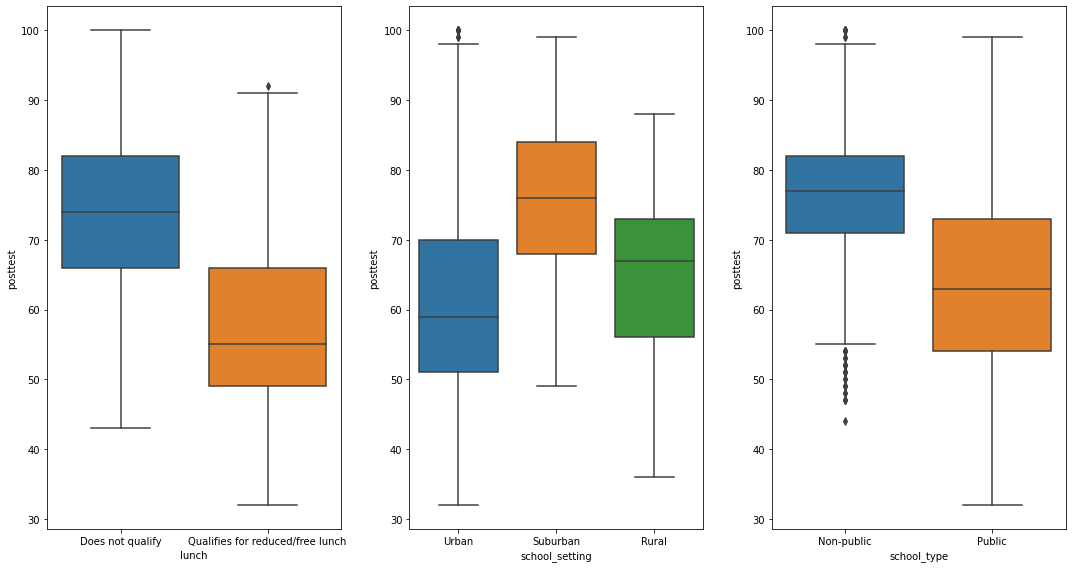

In [11]:
f, axes = plt.subplots(1, 3,figsize=(15,8))
sns.boxplot(data=data, x='lunch', y='posttest', ax=axes[0])
#plt.xticks(fontsize=14)
sns.boxplot(data=data, x='school_setting', y='posttest', ax=axes[1])
#plt.xticks(fontsize=14)
sns.boxplot(data=data, x='school_type', y='posttest', ax=axes[2])
plt.tight_layout()
#plt.xticks(fontsize=14)
plt.show()

<AxesSubplot:xlabel='teaching_method', ylabel='posttest'>

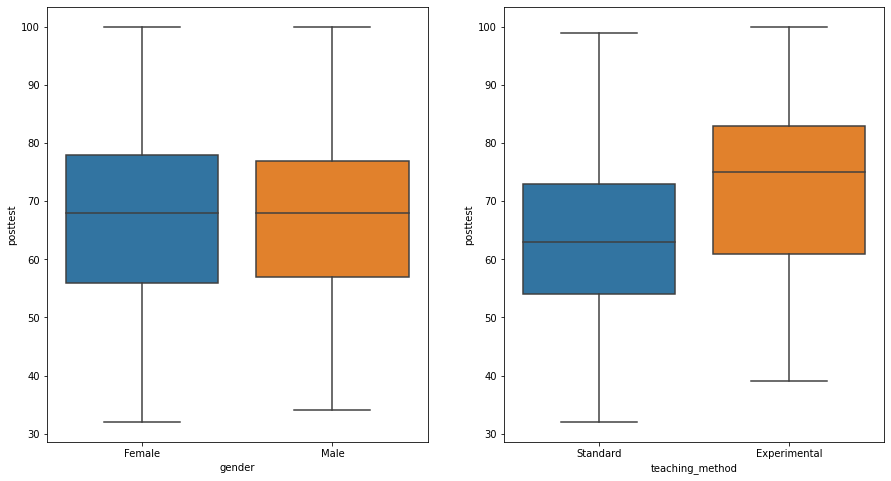

In [12]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.boxplot(data=data, x='gender', y='posttest', ax=axes[0])
sns.boxplot(data=data, x='teaching_method', y='posttest', ax=axes[1])

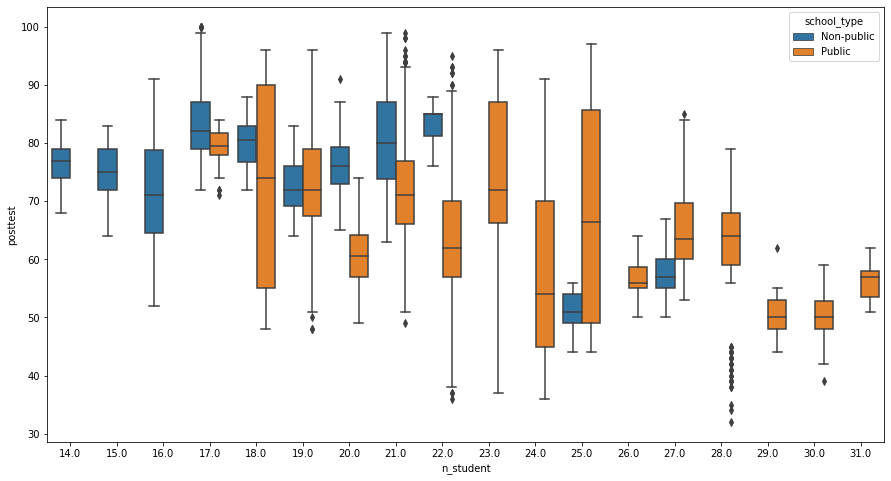

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='n_student', y='posttest',hue='school_type')
plt.show()

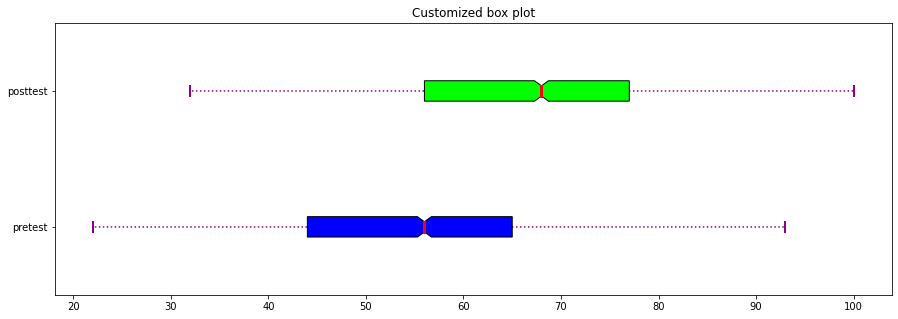

In [14]:
new_data=[]
for col in numeric_columns:
    if col=='n_student':
        continue
    new_data.append(data[col].tolist())

fig = plt.figure(figsize =(15,5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(new_data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['pretest','posttest'])

# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show(bp)

<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Transforming Categorical to Numerical values</b></h1>

In [15]:
label_encoder = LabelEncoder()
for col in cat_columns:
    data[col]=label_encoder.fit_transform(data[col])


In [16]:
data

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,2,0,22,1,20.0,0,0,62.0,72.0
1,0,2,0,22,1,20.0,0,0,66.0,79.0
2,0,2,0,22,1,20.0,1,0,64.0,76.0
3,0,2,0,22,1,20.0,0,0,61.0,77.0
4,0,2,0,22,1,20.0,1,0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...
2128,22,2,1,94,1,30.0,0,0,39.0,55.0
2129,22,2,1,94,1,30.0,0,1,38.0,46.0
2130,22,2,1,94,1,30.0,0,1,45.0,51.0
2131,22,2,1,94,1,30.0,1,1,46.0,53.0


<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Normalizing Numerical values</b></h1>

In [17]:
for col in numeric_columns:
    data[col]= MinMaxScaler().fit_transform(np.array(data[col]).reshape(-1,1))

In [18]:
target=data['posttest']
data=data.drop(['posttest'],axis=1)
data.head(5)

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest
0,0,2,0,22,1,0.352941,0,0,0.563380
1,0,2,0,22,1,0.352941,0,0,0.619718
2,0,2,0,22,1,0.352941,1,0,0.591549
3,0,2,0,22,1,0.352941,0,0,0.549296
4,0,2,0,22,1,0.352941,1,0,0.591549


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.25)

<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Linear Regression</b></h1>

In [20]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print(regression.score(X_test, y_test))
y_pred = regression.predict(X_test)

0.9360400910628881


<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Evaluvation</b></h1>

In [21]:
def evaluvate(y_test,y_pred):
    result={}
    result['MAE'] = round(mean_absolute_error(y_test, y_pred),4)
    result['MSE'] = round(mean_squared_error(y_test, y_pred),4)
    result['r2'] = round(r2_score(y_test, y_pred),4)
    return result
    

In [22]:
result=evaluvate(y_test,y_pred)


In [23]:
print("{:<25} {:<15}".format('Model','Accuracy'))
for k, v in sorted(result.items(), key=lambda item :item[1],reverse=True):
    
    print("{:<25} {:<15}".format(k,v))

Model                     Accuracy       
r2                        0.936          
MAE                       0.0401         
MSE                       0.0026         


<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Polynomial Regression</b></h1>

In [24]:
 poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(X_poly,target, test_size = 0.25)
poly.fit(X_train, y_train)
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
print(poly_reg.score(X_test, y_test))
y_pred = poly_reg.predict(X_test)

0.9426360067261748


<h1 style="background-color:MediumSeaGreen;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>Evaluvation</b></h1>

In [25]:
def evaluvate(y_test,y_pred):
    result={}
    result['MAE'] = round(mean_absolute_error(y_test, y_pred),4)
    result['MSE'] = round(mean_squared_error(y_test, y_pred),4)
    result['r2'] = round(r2_score(y_test, y_pred),4)
    return result
    

In [26]:
result=evaluvate(y_test,y_pred)


In [27]:
print("{:<25} {:<15}".format('Model','Accuracy'))
for k, v in sorted(result.items(), key=lambda item :item[1],reverse=True):
    
    print("{:<25} {:<15}".format(k,v))

Model                     Accuracy       
r2                        0.9426         
MAE                       0.039          
MSE                       0.0024         


# If you find this notebook useful
<h1 style="background-color:tomato;font-family:newtimeroman;font-size:500%;text-align:center;border-radius: 15px 50px;padding: 5px 5px 5px 5px">
    <b>feel free to upvote!</b></h1>